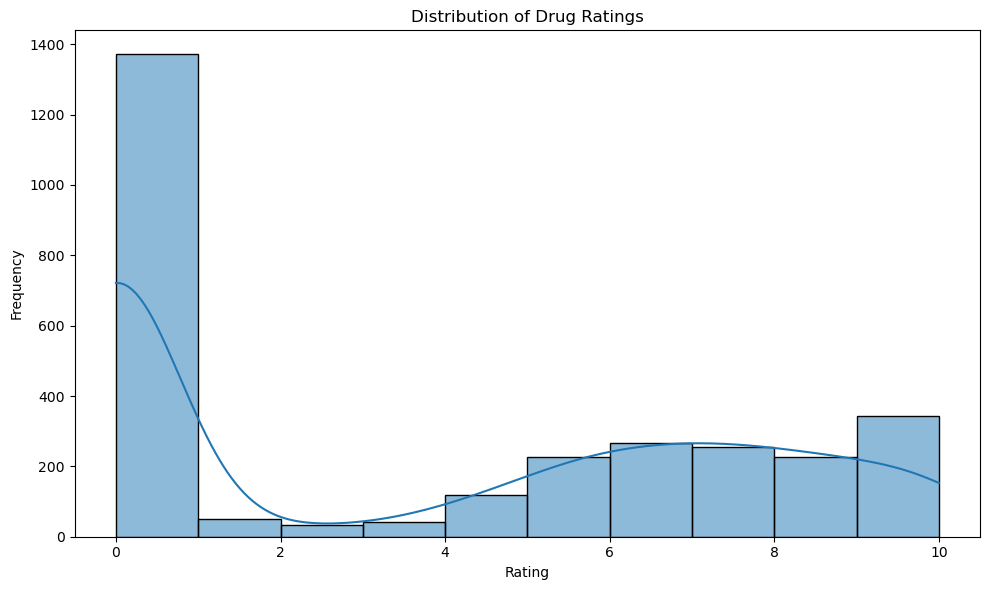

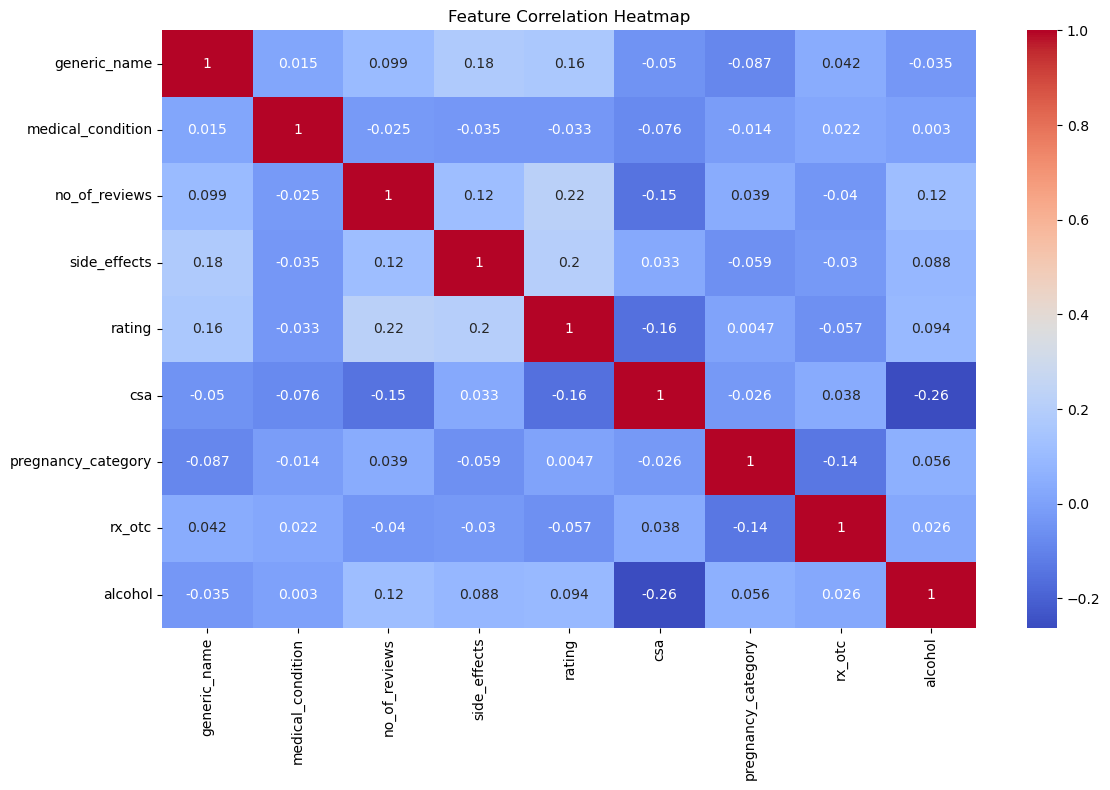

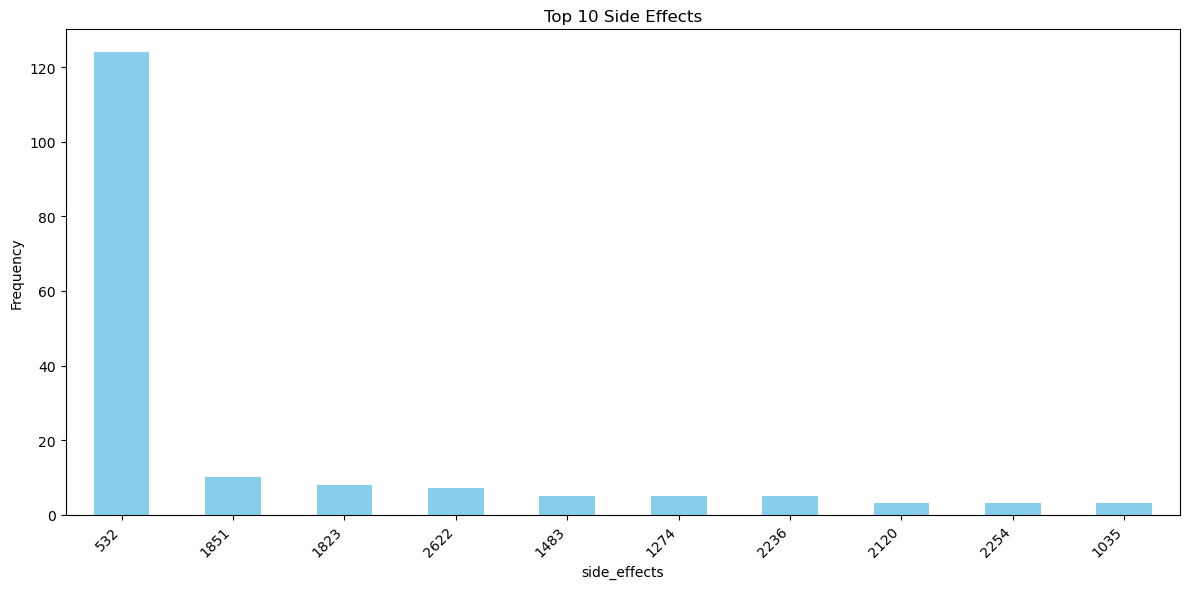

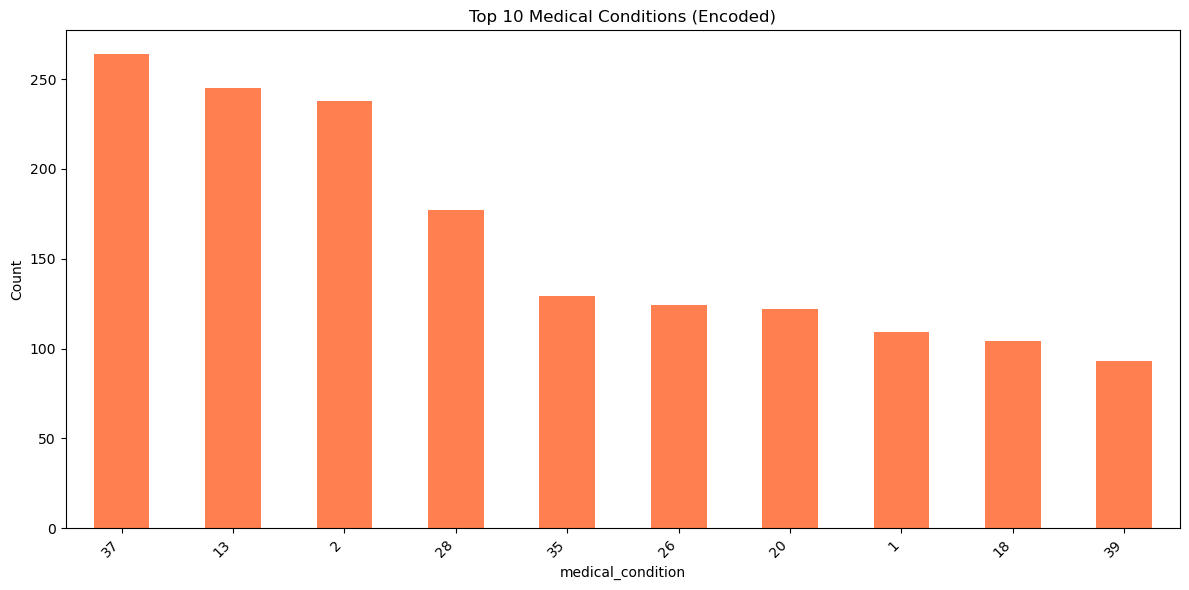

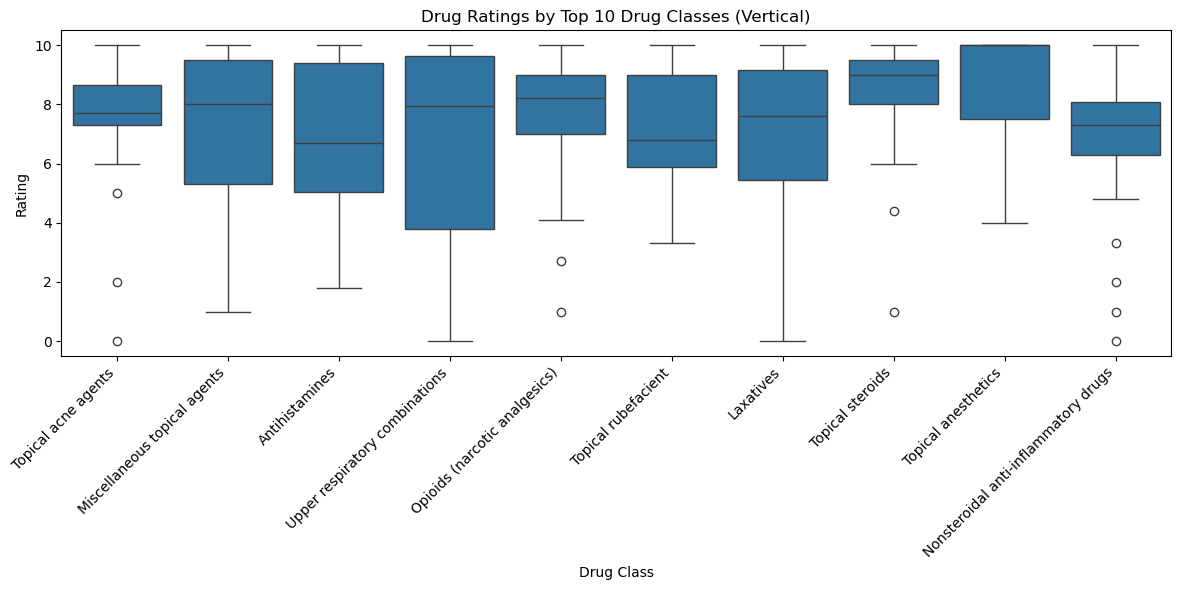

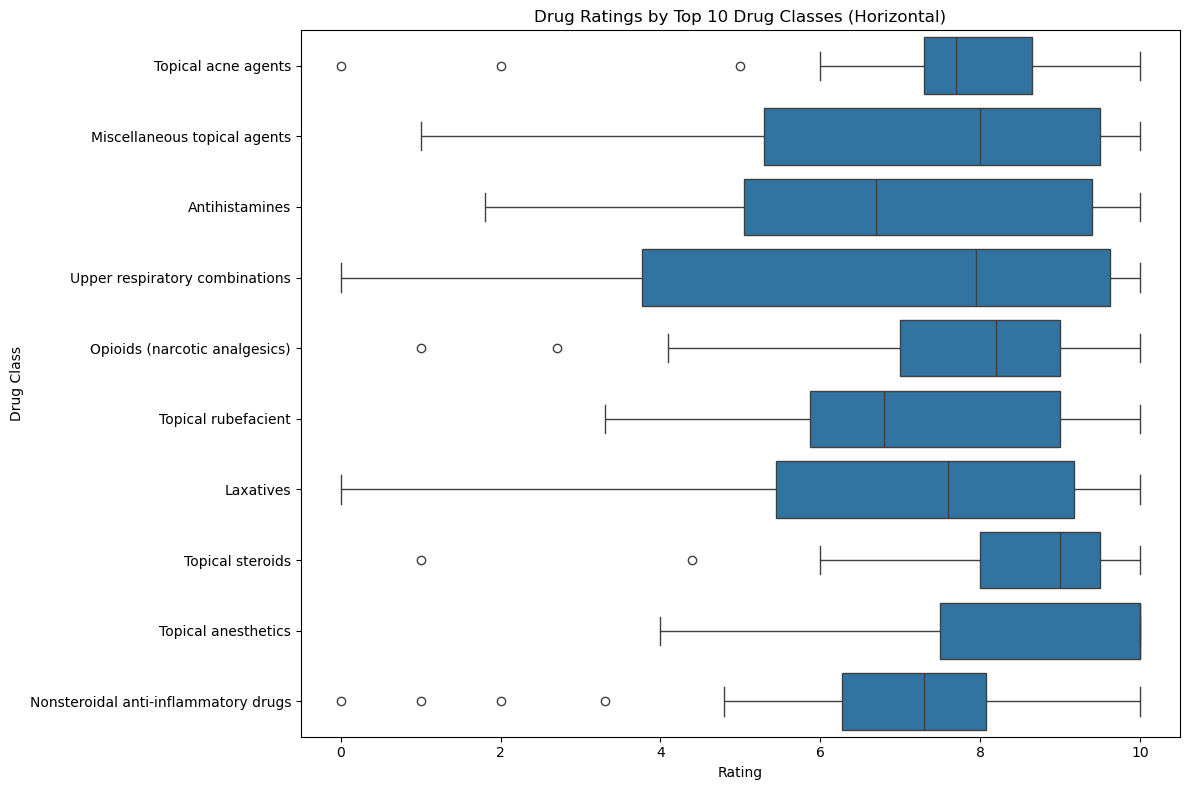

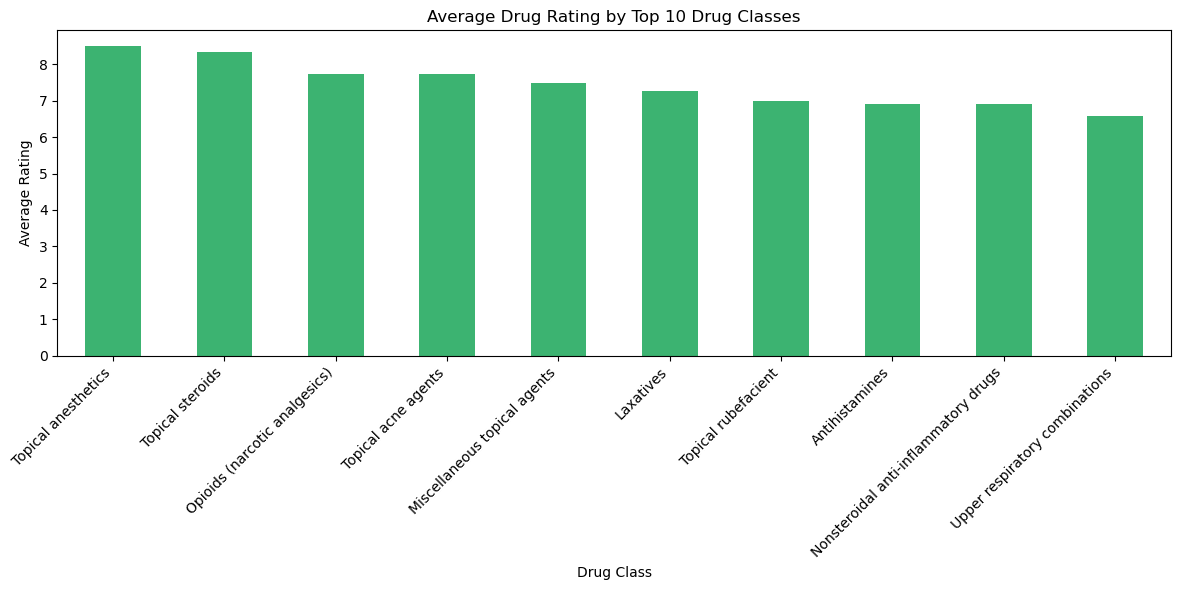

In [7]:
# 🔧 Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# 📥 Load Data
df = pd.read_csv("drugs_side_effects_drugs_com.csv")  # Update path if needed

# 🧹 Data Cleaning
df["side_effects"] = df["side_effects"].fillna('Unknown')
df["related_drugs"] = df["related_drugs"].fillna('Unknown')
df["rating"] = df["rating"].fillna(0)
df["no_of_reviews"] = df["no_of_reviews"].fillna(0)
df["generic_name"] = df["generic_name"].fillna('Unknown')
df["drug_classes"] = df["drug_classes"].fillna('Unknown')
df["rx_otc"] = df["rx_otc"].fillna('Unknown')
df["pregnancy_category"] = df["pregnancy_category"].fillna('Unknown')
df["alcohol"] = df["alcohol"].replace({'X': 1})
df["alcohol"] = df["alcohol"].fillna(0).astype(int)

# 🔤 Label Encoding
le = LabelEncoder()
for col in ['generic_name', 'medical_condition', 'pregnancy_category', 'rx_otc', 'csa', 'side_effects']:
    df[col] = le.fit_transform(df[col])

# 🧠 Feature Engineering
df['high_rating'] = (df['rating'] > 7).astype(int)
features = ['generic_name', 'medical_condition', 'no_of_reviews', 'side_effects',
            'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol']
df_model = df[features]

# 📏 Standardization
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)

# 📊 Visualization 1: Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 📊 Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# 📊 Visualization 3: Top Side Effects
def extract_effects(text):
    return [effect.strip() for effect in re.split(r'[;]', str(text))]

side_effects = df['side_effects'].astype(str).apply(extract_effects).explode()
side_effect_counts = side_effects.value_counts().head(10)

plt.figure(figsize=(12, 6))
side_effect_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Side Effects')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📊 Visualization 4: Top Medical Conditions
condition_counts = df['medical_condition'].value_counts().head(10)

plt.figure(figsize=(12, 6))
condition_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Medical Conditions (Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📊 Visualization 5: Boxplot of Ratings by Drug Class
df_raw = pd.read_csv("drugs_side_effects_drugs_com.csv")
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Filter Top 10 Most Common Drug Classes
top_classes = df_raw['drug_classes'].value_counts().head(10).index
df_top = df_raw[df_raw['drug_classes'].isin(top_classes)]

# ✅ Step 2: Boxplot (Vertical)
plt.figure(figsize=(12, 6))
sns.boxplot(x='drug_classes', y='rating', data=df_top)
plt.title('Drug Ratings by Top 10 Drug Classes (Vertical)')
plt.xlabel('Drug Class')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ✅ Step 3: Boxplot (Horizontal)
plt.figure(figsize=(12, 8))
sns.boxplot(y='drug_classes', x='rating', data=df_top)
plt.title('Drug Ratings by Top 10 Drug Classes (Horizontal)')
plt.ylabel('Drug Class')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

# ✅ Step 4: Bar Plot of Average Ratings per Class
avg_ratings = df_top.groupby('drug_classes')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_ratings.plot(kind='bar', color='mediumseagreen')
plt.title('Average Drug Rating by Top 10 Drug Classes')
plt.ylabel('Average Rating')
plt.xlabel('Drug Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

